In [1]:
# B8IT109 Advanced Data Analytics
# CA-1b Optimization
# Name: Maria Harris

# Student Number: 10334546
# Date: Monday 05/09/2016

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as pyt
%matplotlib inline
import random
import scipy
from decimal import *

In [3]:
################################################################
# Part A - plot each of the Target Functions                   #
# Part B - use RANDOM SEARCH on each of the Target Functions   #
################################################################

In [4]:
#Target function 1, return even spaced numbers 

def plot_function1(x1,x2):
    x = np.linspace(x1,x2,50)
    #plot the equation y1=(x-1)**2

    y_list=list()
    for i in x:
        newy = gety(i) 
        y_list.append(newy)
    
    newy = y_list
    plt.title('Random Sampling for Target Function 1')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,y_list,'r')
    plt.grid(True)
    return

def gety(x):
        y = (x - 1.0)**2.0
        return y

min y value is 0.382021
1
min y value is 0.169111
3
min y value is 0.000997
4
min y value is 0.000245
28
min y value is 0.000123
32

global minimum y is: 0.000123
no. of samples: 50
x for minimum y is: 0.988923324345
end


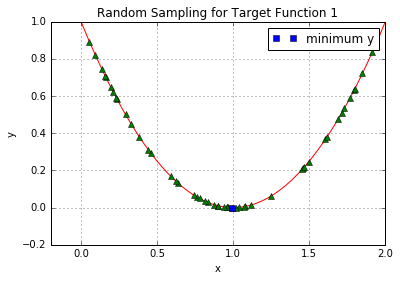

In [5]:
minimum=float('+inf')
count=0

#pick 50 random samples starting at x=0 between 0 and 2
#round the y values and minimum value to 6 decimal places for comparing

# green ^ are points tried and blue squares are minimums
plot_function1(0,2)

while count < 50:  
    x1 = random.uniform(0,2)

    newy = round(gety(x1),6)
    plt.plot(x1,newy,marker = '^',color='g')

    if newy < round(minimum,6):
        minimum=newy
        print 'min y value is', minimum
        #store corresponding x-value for that minimum y
        x_for_minimum_y = x1
        count = count+1
        print count
        continue
    
    count=count+1
    continue
    
# after 50 random numbers, print the minimum
print '\nglobal minimum y is:',minimum
print 'no. of samples:',count
print 'x for minimum y is:',x_for_minimum_y
plt.plot(x_for_minimum_y,minimum,'bs',label='minimum y') 
plt.ylim(-0.2)
plt.xlim(-0.2)
plt.legend(loc='upper right')
print'end'

In [6]:
#plot Target Function 2, the equation y2=x(x+1.5)(x-1.5)(x-2)
def plot_function2(x1,x2):
    x = np.linspace(x1,x2,50) 
    
    y_list2=list()
    for i in x:
        newy2=gety1(i)    
        y_list2.append(newy2)
    
    newy2=y_list2
    plt.title('Random Sampling, Target Function 2, minimised starting at x=0')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,y_list2,'r')
    plt.axis([-2,2.0,-4,4])
    plt.grid(True)
    return

def gety1(x):
    y = ((x)*(x + 1.5)*(x-1.5)*(x-2))
    return y



min y value is -3.77623

global minimum y is: -3.77623
no.of samples: 26


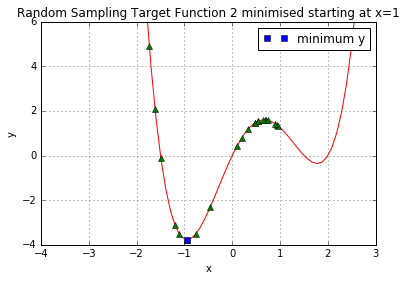

In [7]:
plot_function2(-2,3)
plt.title('Random Sampling Target Function 2 minimised starting at x=1')

plt.axis([-4,3,-4,6])
plt.grid(True)

minimum=float('+inf')
count=0

#pick 25 random samples starting first at x=1 between 1 and -2
while count<=25:  
    x1=random.uniform(1,-2)
    newy=round(gety1(x1),6)
    plt.plot(x1,newy,marker='^',color='g')
    #print 'newy is:',newy
    if newy < round(minimum,6):
        minimum=newy
        print 'min y value is', minimum
        x_for_minimum_y = x1
        count=count+1
        continue
    
    count=count+1
    continue
    
# after 25 random numbers, print the minimum
print '\nglobal minimum y is:',minimum
print 'no.of samples:',count
plt.plot(x_for_minimum_y,minimum,'bs',label='minimum y')
plt.legend(loc='upper right')

In [8]:
#Optimize using scipy

from scipy import optimize
def f(x):
    return (x-1)**2
x_min=optimize.brent(f)
print 'x is:',x_min
print 'minimum y for function 1 is:',gety(x_min)

x is: 1.0
minimum y for function 1 is: 0.0


In [9]:
from scipy import optimize
def f(x):
    return (x)*(x + 1.5)*(x-1.5)*(x-2)
x_min=optimize.brent(f)
print 'x is:',x_min
print 'minimum y for function 2 is:',gety(x_min)

x is: -0.946064908201
minimum y for function 2 is: 3.78716862693


first x is 0.85912118048
best-y 0.0198468417892

X-value is:  1.00762118048
Minimum Y-value is: 4.49940663078e-06
No. of searches is: 26


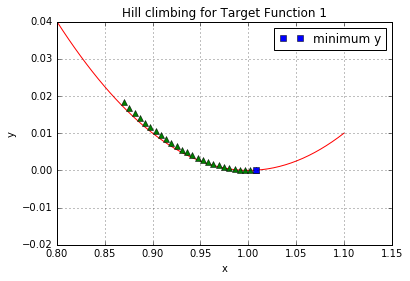

In [11]:
#######################################################
# Using Hill climbing on each of the target functions #
#######################################################

#Plot function 1 between points x=0.5 and x=1
plot_function1(.8,1.1)
plt.title('Hill climbing for Target Function 1')

# random point between x=.5 and x=1
x=random.uniform(.5,1)
print 'first x is',x
#choose a constant number which you want to decrease by each time
#in the hill climb
decrease=.0055
count=0
best_y=gety(x)
print 'best-y',best_y

# search to the left
try_x = x - decrease
try_y = gety(try_x)

if try_y <= best_y:
    print 'y val is',try_y

    while try_y <= best_y:
        best_y = try_y
        try_x = try_x-decrease   
        print 'new_try_x is',try_x
        try_y = gety(try_x)
        plt.plot(try_x,try_y,marker='^',color='g')
        plt.ylim(-0.02)
        count=count+1
        continue
    print try_x
else:
#if try_y is bigger than last y then search to the right             
    try_x = x + decrease
    while True:        
        try_y = gety(try_x)  
        #print 'y-value is',try_y
        if try_y < best_y:
            best_y = try_y
            try_x = try_x + decrease 
            count=count+1
            #print 'try_x is',try_x
            plt.plot(try_x,try_y,marker='^',color='g')
            #start the y-axis of graph so you can clearly see the minimum value
            plt.ylim(-0.02)
            continue
        print '\nX-value is: ',try_x 
        break        
print 'Minimum Y-value is:',best_y
print 'No. of searches is:',count
plt.plot(try_x,best_y,'bs',label='minimum y')
plt.legend(loc='upper right')

       

first x is:  0.0
y val is -0.253964349375

Minimum Y-value is: -3.77543614938
No. of searches is: 17


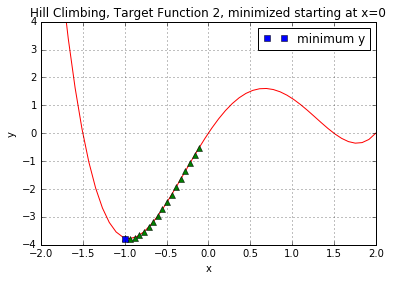

In [12]:

plot_function2(-2,2)
plt.title('Hill Climbing, Target Function 2, minimized starting at x=0')
minimum = float('+inf')
count = 0

# random point starting at x=0
#x = random.uniform(-1.5,0)
x=0.0
print 'first x is: ',x
#choose a constant number which you want to decrease by each time
#in the hill climb
decrease=.055
count=0
best_y = gety1(x)

# search to the left
try_x = x - decrease
try_y = gety1(try_x)

if try_y <= best_y:
    print 'y val is',try_y

    while try_y <= best_y:
        best_y = try_y
        try_x = try_x-decrease   
        #print 'new_try_x is',try_x
        try_y = gety1(try_x)
        plt.plot(try_x,try_y,marker='^',color='g')
        plt.ylim(-0.02)
        count=count+1
        continue
else:
#if try_y is bigger than last y then search to the right             
    try_x = x + decrease
    while True:        
        try_y = gety1(try_x)  
        print 'y-value is',try_y
        if try_y < best_y:
            best_y = try_y
            try_x = try_x + decrease 
            count=count+1
            #print 'try_x is',try_x
            plt.plot(try_x,try_y,marker='^',color='g')
            #start the y-axis of graph so you can clearly see the minimum value
            continue
        print '\nX-value is: ',try_x 
        break        
print '\nMinimum Y-value is:',best_y
print 'No. of searches is:',count
plt.plot(try_x,best_y,'bs',label='minimum y')
plt.ylim(-4)
plt.legend(loc='upper right')


first x is:  1.0
y-value is 1.13353565063
y-value is 1.00558341
y-value is 0.868469200625
y-value is 0.72473856
y-value is 0.577156640625
y-value is 0.42870821
y-value is 0.282597650625
y-value is 0.14224896
y-value is 0.011305750625
y-value is -0.10636875
y-value is -0.206691699375
y-value is -0.28536064
y-value is -0.337853499375
y-value is -0.35942859
y-value is -0.345124609375

X-value is:  1.825
Minimum Y-value is: -0.35942859
No. of searches is: 14


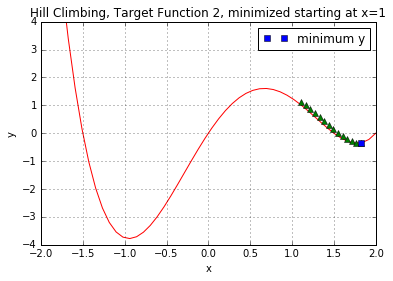

In [13]:
#Target function 2 Hill climbing starting at x=1

plot_function2(-2,2)
plt.title('Hill Climbing, Target Function 2, minimized starting at x=1')
minimum = float('+inf')
count = 0

# random point starting at x=0
#x = random.uniform(1,2)
x=1.0
print 'first x is: ',x
#choose a constant number which you want to decrease by each time
#in the hill climb
decrease=.055
count=0
best_y = gety1(x)

# search to the left
try_x = x - decrease
try_y = gety1(try_x)

if try_y <= best_y:
    print 'y val is',try_y

    while try_y <= best_y:
        best_y = try_y
        try_x = try_x-decrease   
        #print 'new_try_x is',try_x
        try_y = gety1(try_x)
        plt.plot(try_x,try_y,marker='^',color='g')
        plt.ylim(-0.02)
        count=count+1
        continue
else:
#if try_y is bigger than last y then search to the right             
    try_x = x + decrease
    while True:        
        try_y = gety1(try_x)  
        print 'y-value is',try_y
        if try_y < best_y:
            best_y = try_y
            try_x = try_x + decrease 
            count=count+1
            #print 'try_x is',try_x
            plt.plot(try_x,try_y,marker='^',color='g')
            #start the y-axis of graph so you can clearly see the minimum value
            continue
        print '\nX-value is: ',try_x 
        break        
print 'Minimum Y-value is:',best_y
print 'No. of searches is:',count
plt.plot(try_x,best_y,'bs',label='minimum y')
plt.ylim(-4)
plt.legend(loc='upper right')

In [14]:
######################################################
#Part C Use Gradient Descent on each target function
######################################################


Local minimum occurs at ( 1.00003402824 , 1.15792089238e-09 )
Number of points examined: 43


(0, 0.25)

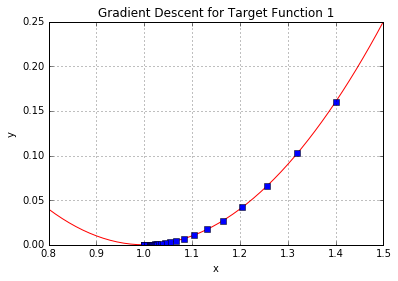

In [15]:
plot_function1(.8,1.5)
plt.title('Gradient Descent for Target Function 1')
x_old = 0.0
x_new = 1.5
count=0
#set precision near enough to 0, so the loop stops
#if the value of x is not changing by more than that
#precision, as the slope is nearing 0
precision = 0.00001
alpha = 0.1

#differentiate the target function 1 
def f1_derivative(x):
    return 2 * x - 2

while abs(x_new - x_old) > precision:
    x_old = x_new
    x_new = x_old - alpha * f1_derivative(x_old)
    y = gety(x_new)
    count=count+1
    plt.plot(x_new,y,'bs',label='minimum y')
 
print '\nLocal minimum occurs at', '(',x_new,',', y,')'
print 'Number of points examined:', count
plt.ylim(0)
  


x: -0.45
y is: -2.25736875

x: -0.94455
y is: -3.77648515035

x: -0.947211232401
y is: -3.77649374999

x: -0.945192193658
y is: -3.77649862208

x: -0.946726258652
y is: -3.77650146881

x: -0.945561967851
y is: -3.77650309365

x: -0.946446362551
y is: -3.7765040377

x: -0.945775006389
y is: -3.77650457885

x: -0.946284890235
y is: -3.77650489225

x: -0.945897784808
y is: -3.77650507234

x: -0.946191758942
y is: -3.77650517644

x: -0.945968557732
y is: -3.77650523635

x: -0.946138051685
y is: -3.77650527094

x: -0.946009357605
y is: -3.77650529086

x: -0.946107082097
y is: -3.77650530236

x: -0.946032879768
y is: -3.77650530898

x: -0.946089224718
y is: -3.7765053128

x: -0.946046441373
y is: -3.776505315

x: -0.946078928248
y is: -3.77650531627

x: -0.94605426042
y is: -3.77650531701

x: -0.94607299145
y is: -3.77650531743

x: -0.946058768604
y is: -3.77650531767

x: -0.946069568407
y is: -3.77650531781

x: -0.94606136788
y is: -3.77650531789

Local minimum occurs at ( -0.94606136788 ,

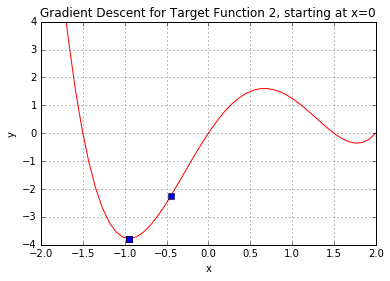

In [16]:
#Gradient Descent for Target Function 2, starting at x=0
plot_function2(-2,2.0)
plt.title('Gradient Descent for Target Function 2, starting at x=0')

x_old = 0.5
x_new = 0.0
count=0
#set precision near enough to 0, so the loop stops
#if the value of x is not changing by more than that
#what that precision is set to, as the slope is nearing 0

precision = 0.00001
alpha = 0.1

#differentiate the target function 2 
#if the derivative is positive, then move to the left
#decrease x

#if the derivative is negative, then move to the right,
#increase x
def f2_derivative(x):
    return (4 *(x**3.0)) - (6*(x**2.0)) - (4.5 * x) + 4.5

while abs(x_new - x_old) > precision:
    x_old = x_new
    x_new = x_old - alpha * f2_derivative(x_old)
    print '\nx:',x_new
    y = gety1(x_new)
    print 'y is:',y
    count = count+1
    plt.plot(x_new, y,'bs',label='minimum y')
    
print '\nLocal minimum occurs at', '(',x_new,',',y,')'
print 'Number of points examined:',count





x: 1.2
y: 0.7776

x: 1.4628
y: 0.0866096396211

x: 1.70289998354
y: -0.328788944637

x: 1.78385167962
y: -0.359406236185

x: 1.77528411898
y: -0.359692821959

x: 1.7771240896
y: -0.359706304725

x: 1.77674793219
y: -0.359706865842

x: 1.77682567592
y: -0.359706889831

x: 1.77680964349
y: -0.359706890851

x: 1.77681295124
y: -0.359706890895

Local minimum occurs at ( 1.77681295124 , -0.359706890895 )
Number of point examined: 10


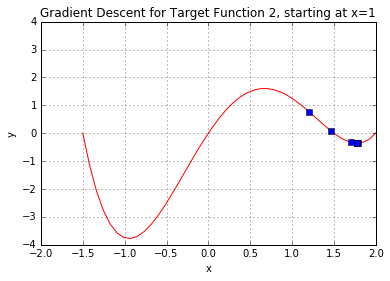

In [17]:
#Gradient Descent for Target Function 2, starting at x=1
plot_function2(-1.5,2.5)
plt.title('Gradient Descent for Target Function 2, starting at x=1')

x_old = 0.5
x_new = 1.0
count=0

#set precision near enough to 0, so the loop stops
#if the value of x is not changing by more than that
#what that precision is set to, as the slope is nearing 0

precision = 0.00001
alpha = 0.1

#differentiate the target function 2 
#if the derivative is positive, then move to the left
#decrease x

#if the derivative is negative, then move to the right,
#increase x
def f2_derivative(x):
    return (4 *(x**3.0)) - (6*(x**2.0)) - (4.5 * x) + 4.5

while abs(x_new - x_old) > precision:
    x_old = x_new
    x_new = x_old - (alpha * f2_derivative(x_old))
    print '\nx:',x_new
    y = gety1(x_new)
    print 'y:',y
    count=count+1
    plt.plot(x_new,y,'bs')
    
print '\nLocal minimum occurs at', '(',x_new,',',y,')'
print 'Number of point examined:',count

In [18]:
############################################################
#Part D Use Simulated Annealing on each function
############################################################


global minimumis: (1.0008915659038529, 7.948897609129752e-07)


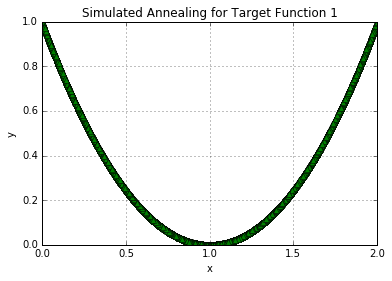

In [21]:
plot_function1(.5,1.5)
plt.title('Simulated Annealing for Target Function 1')


def acceptance_probability(old_y,new_y,temp):
    acc_prob = 2.71828*((old_y - new_y)/temp)
    return acc_prob

def find_a_neighbor():
    x2 = random.uniform(0,2)
    return x2

def cost(x2):
    newy2 = round(gety(x2),6)
    #plt.plot(x2,newy,marker = '^',color='g')
    return newy2

def anneal(solution):
    old_cost_y = gety(solution)
    temp = 1.0
    temp_min = 0.00001
    alpha = 0.9
    #set the temperature to 1.0 and decrease it at the end of each iteration
    #by multiplying it by alpha, alpha is a value between 0.8 and 0.99

    while temp > temp_min:
        i = 1
        while i <= 50:
            new_x_solution = find_a_neighbor()
            new_cost_y = gety(new_x_solution)
            plt.plot(new_x_solution,new_cost_y,marker = '^',color='g')
            
            # generate a number for comparison later
            generated_number = random.uniform(0,1)
            
            #calculate acceptance probability
            acc_prob = acceptance_probability(old_cost_y,new_cost_y,temp)
 
 
#if the acceptance probability is larger than the generated random
#number between 0 and 1, then accept the new x value
            if acc_prob > generated_number:
                solution = new_x_solution
                old_cost_y = new_cost_y
            i = i + 1
    
        temp = temp * alpha 
    #decrease temp by multiplying it by alpha after every 50th iteration
    
    return solution,old_cost_y
    
x1 = random.uniform(0,2)
minimum = anneal(x1)

#plt.plot(x_new,y,'bs')

    
print '\nglobal minimumis:',minimum



global minimumis: (-0.9484385164158622, -3.7764556802675786)


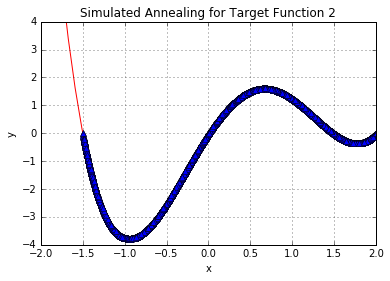

In [23]:
#########################################################
# Simulated Annealing for Target Function 2             #
#########################################################

plot_function2(-2,2)
plt.title('Simulated Annealing for Target Function 2')


def acceptance_probability(old_y,new_y,temp):
    acc_prob = 2.71828*((old_y - new_y)/temp)
    return acc_prob

def find_a_neighbor():
    x2 = random.uniform(-1.5,2)
    return x2

def cost(x2):
    newy2 = round(gety1(x2),6)
    return newy2

def anneal(solution):
    old_cost_y = gety1(solution)
    temp = 1.0
    temp_min = 0.00001
    alpha = 0.9
    #set the temperature to 1.0 and decrease it at the end of each iteration
    #by multiplying it by alpha, alpha is a value between 0.8 and 0.99

    while temp > temp_min:
        i = 1
        while i <= 50:
            new_x_solution = find_a_neighbor()
            new_cost_y = gety1(new_x_solution)
            plt.plot(new_x_solution,new_cost_y,marker = '^',color='b')
            
            # generate a number for comparison later
            generated_number = random.uniform(0,1)
            
            #calculate acceptance probability
            acc_prob = acceptance_probability(old_cost_y,new_cost_y,temp)
 
 
#if the acceptance probability is larger than the generated random
#number between 0 and 1, then accept the new x value
            if acc_prob > generated_number:
                solution = new_x_solution
                old_cost_y = new_cost_y
            i = i + 1
    
        temp = temp * alpha 
    #decrease temp by multiplying it by alpha after every 50th iteration
    
    return solution,old_cost_y
    
x1 = random.uniform(-1.5,2)
minimum = anneal(x1)

    
print '\nglobal minimumis:',minimum
